# Animation for the 2D-wave equation

\begin{equation}
    \partial^2_tp(\mathbf{r},t) = c^2\left[\partial_x^2p(\mathbf{r},t) + \partial_z^2(\mathbf{r},t)\right] + s(\mathbf{r},t)\,,
\end{equation}

where $\mathbf{r} \equiv (x,z)$.

Stablishing the following notation

$x\rightarrow idx$

$z\rightarrow jdz$

$t\rightarrow ndt$

The pressure at the point $\mathbf{r}$ and time $t$ is defined by the discrete vector $p_{i,j}^n$.
The numerical derivatives are given by

\begin{equation}
    \partial_x^2p(\mathbf{r},t) \equiv \frac{p_{i+1, j}^{n} - 2p_{i, j}^{n} + p_{i-1, j}^{n}}{dx^2}\,,
\end{equation}
\begin{equation}
    \partial_z^2p(\mathbf{r},t) \equiv \frac{p_{i, j+1}^{n} - 2p_{i, j}^{n} + p_{i, j-1}^{n}}{dz^2}\,,
\end{equation}
and the 2nd time derivative

\begin{equation}
    \partial_t^2p(\mathbf{r},t) \equiv \frac{p_{i, j}^{n+1} - 2p_{i, j}^{n} + p_{i, j}^{n-1}}{dt^2}\,.
\end{equation}

Now we can write down the recursive equation to be solved numerically

\begin{equation}
    p_{i, j}^{n+1}=  c^2dt^2\left[\partial_x^2p_{i,j}^n + \partial_z^2p_{i,j}^n\right] + 2p_{i, j}^{n} - p_{i, j}^{n-1} + s_{i,j}^n
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib

matplotlib.use('nbagg')
%matplotlib notebook

In [2]:
### PARAMETER CONFIGURATION ###
nx = 500          # number of grid points along the x-direction
nz = nx           # number of grid points along the z-direction
dx = 1.           # step in x
dz = dx           #step in z
c0 = 580.         # speed of propagation in the medium (in m/s)
isrcx = int(nx/2) # source location in grid points in x
isrcz = isrcx     # source location in grid points in z

ircvx = 330       # receiver location in grid points in x
ircvz = ircvx     # receiver location in grid points in z

nt = 500          # number of grid points in time
dt = 0.0010       # time step

eps = c0*dt/dx

print ('The precision is given by the stability criterion:', eps)


The precision is given by the stability criterion: 0.58


In [3]:
### SOURCE TIME FUNCTION ###

f0 = 40.       # dominant frequency
t0 = 4./f0     # time shift

t = np.linspace(0, nt*dt,nt)

src = -8. * (t - t0) * f0 * (np.exp(-1.0 * (4*f0) ** 2 * (t - t0) ** 2)) # source time function
spec = np.fft.fft(src)                                                   # spectrum of the time source function

# check https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html

n = spec.size
freq = np.fft.fftfreq(n, d = dt)

<IPython.core.display.Javascript object>


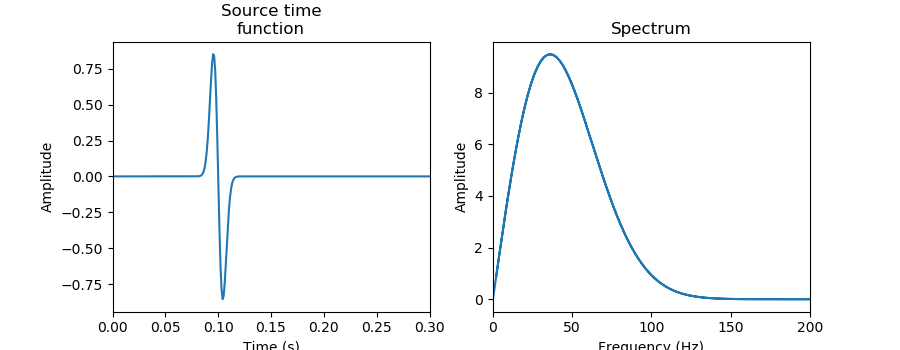

In [4]:
### CREATING THE FIGURES FOR THE SOURCE FUNCTION AND ITS SPECTRUM ###

fig, (ax1,ax2) = plt.subplots(1,2, figsize = [9.0,3.5])

ax1.set_title('Source time\nfunction')
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time (s)')
ax1.set_xlim(0,0.3)
ax1.set_ylim(1.1*np.min(src), 1.1*np.max(src))
ax1.plot(t,src)

ax2.set_title('Spectrum')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_xlim(0,200)
ax2.plot(np.abs(freq),np.abs(spec))

<IPython.core.display.Javascript object>


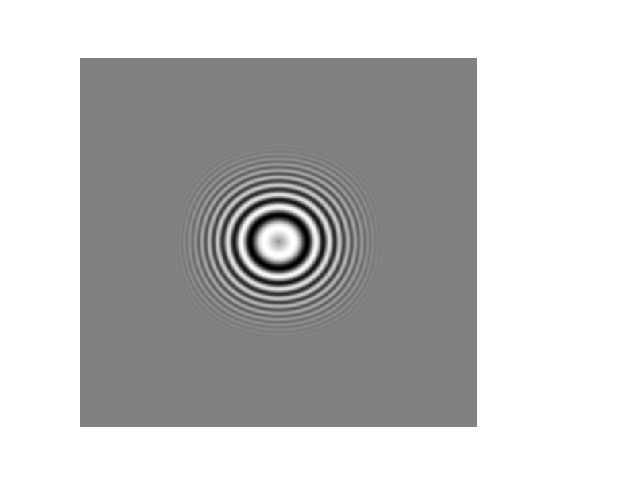

In [80]:
### ANIMATION OF THE 2D FIELD ###

p = np.zeros((nx,nz))
pnew = np.zeros((nx,nz))
pold = np.zeros((nx,nz))
d2px = np.zeros((nx,nz))
d2pz = np.zeros((nx,nz))

c = np.zeros((nx,nz))
c = c + c0

fig, ax = plt.subplots()

#img = ax.imshow(p, interpolation = 'nearest', cmap = 'jet', )
img = ax.imshow(p, cmap='gray', aspect='auto', interpolation = 'nearest')
ax.set_title('Time step nt=0')
ax.set_xlim(0,nx)
ax.set_ylim(0,nz)
ax.set_xlabel('$n_x$')
ax.set_ylabel('$n_z$')
fig.colorbar(img)

\begin{equation}
    p_{i, j}^{n+1}=  c^2dt^2\left[\partial_x^2p_{i,j}^n + \partial_z^2p_{i,j}^n\right] + 2p_{i, j}^{n} - p_{i, j}^{n-1} + s_{i,j}^ndt^2
\end{equation}

In [84]:
### MAKING THE VECTORS AND PLOTING IT ###

for it in range(nt):
    for i in range (1,nx-1):
        d2px[i, :] = (p[i+1, :] - 2*p[i, :] + p[i-1, :])/dx**2
    for j in range (1,nz-1):
        d2pz[:, j] = (p[:, j+1] -2*p[:, j] + p[:, j-1])/dz**2
        
    pnew = c0**2*dt**2*(d2pz + d2px) + p - pold
    pnew[isrcx, isrcz] = p[isrcx, isrcz] + src[it]*dt**2
    p, pold = pnew, p
    #print (np.max(p),"\n")
    if it%5 == 0:
        ax.set_title('Time step nt=%d'%it)
        ax.imshow(p, cmap='gray', aspect='auto', interpolation = 'nearest')
        plt.gcf().canvas.draw()
    
        

KeyboardInterrupt: 